<a href="https://colab.research.google.com/github/Pokemon-Catcher/pandasHomework/blob/master/Copy_of_02_02_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.2 Кластеризация. Баннеры.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [ODS: Обучение без учителя: PCA и кластеризация](https://habrahabr.ru/company/ods/blog/325654/)
- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

## Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 элементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

###  2.0 Read data (0.5 балла): 
**Загрузите датасет используя pandas `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import numpy as np

Mounted at /content/drive/


In [3]:
df=pd.read_csv('/content/drive/My Drive/Data/checkins.csv.gz', na_values='?')

offices=pd.DataFrame(np.reshape([33.751277, -118.188740, 'Los Angeles',
25.867736, -80.324116, 'Miami',
51.503016, -0.075479, 'London',
52.378894, 4.885084, 'Amsterdam',
39.366487, 117.036146, 'Beijing',
-33.868457, 151.205134, 'Sydney'],(-1,3)),columns=['latitude','longitude','city'])


df.head()

,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037


###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

In [0]:
from sklearn.cluster import MeanShift
import pickle

ms=None
try: #Мне надоело ждать 20 минут, каждый раз, поэтому я решил просто загружать всё из файла
  with open('/content/drive/My Drive/Data/file', 'rb') as f:
    ms=pickle.load(f)
except FileNotFoundError:
  ms=MeanShift(bandwidth=0.1, n_jobs=-1).fit(df)
  with open('/content/drive/My Drive/Data/file', 'wb+') as f:
    f.write(pickle.dumps(ms))

### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

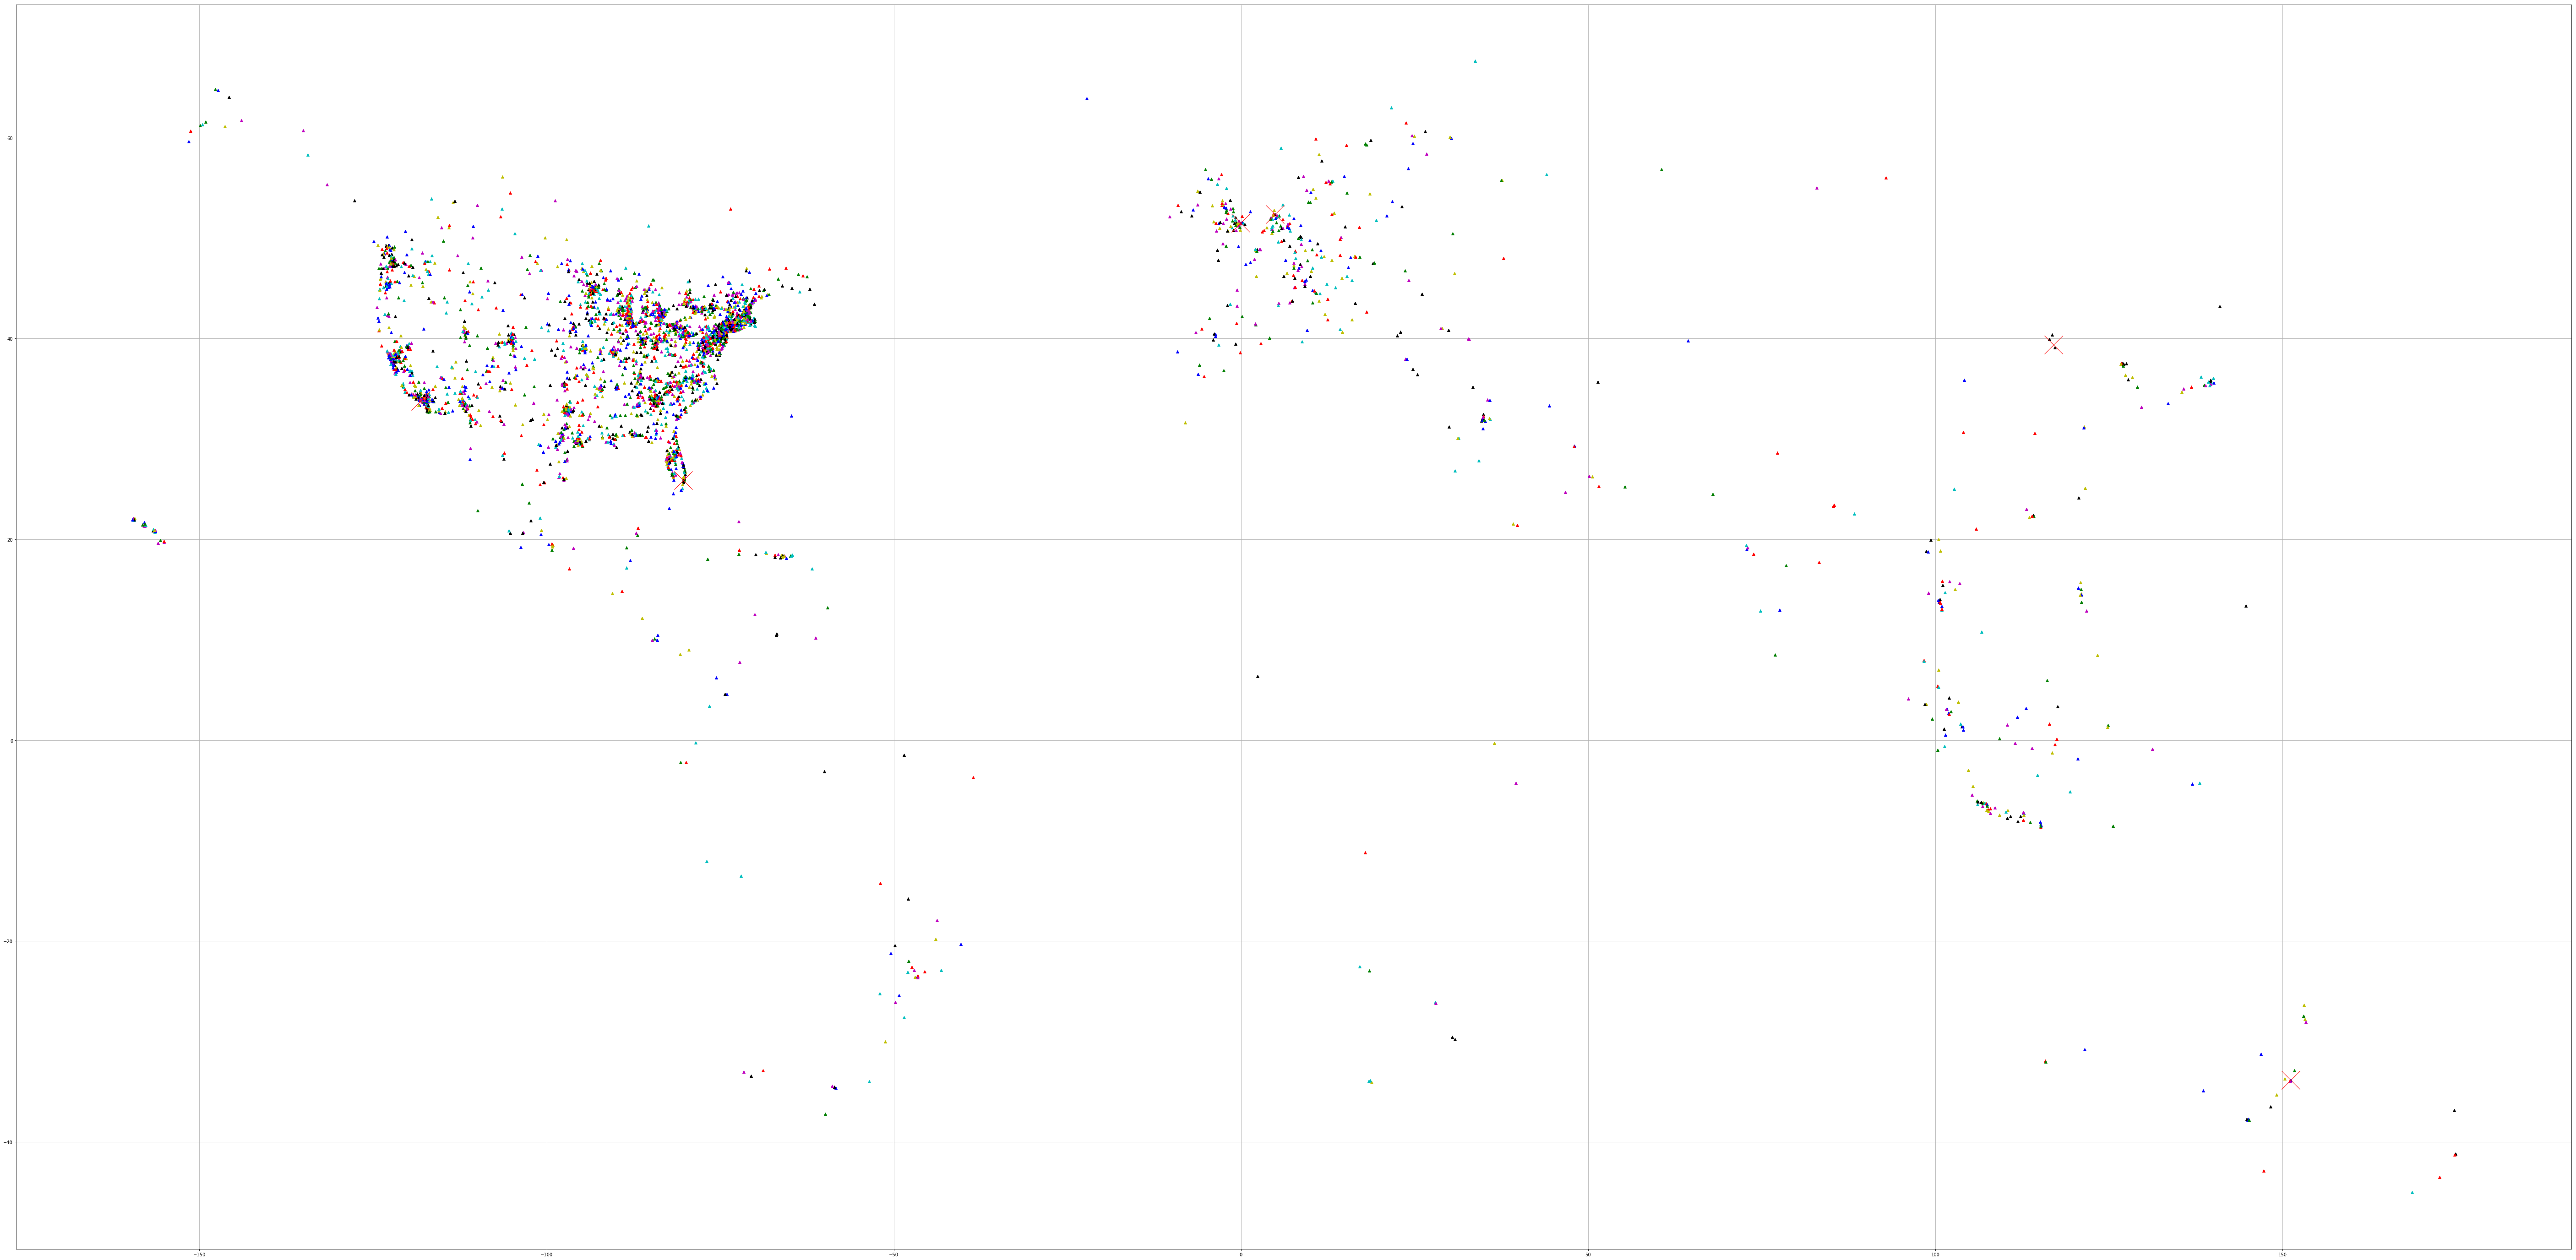

In [10]:
import matplotlib.pyplot as plt
from itertools import cycle

labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

plt.figure(figsize=(100, 50))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
  my_members = labels == k
  cluster_center = cluster_centers[k]
  plt.plot(df[my_members].longitude, df[my_members].latitude,'o'+col, ms=1)
  plt.plot(cluster_center[1], cluster_center[0], '^'+col)
for i, row in offices.iterrows():
  plt.plot(float(row.longitude), float(row.latitude) , 'xr', ms=40)
plt.grid(True)
plt.show()

###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

In [0]:
from itertools import groupby

labels_group=groupby(labels_unique, lambda x: (labels == x).sum())
labels_len=[]
for key, group in labels_group:
  if(key>15):
    labels_len.append(key)
len(labels_len)

446

###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

In [122]:
from geopy.distance import vincenty

#offices.groupby(['name']).apply(lambda x: .km)
df=pd.DataFrame(cluster_centers,columns=['latitude','longitude'])
df2=pd.DataFrame([])
for index, i in offices.iterrows():
  df2=df2.append(df.apply(lambda row: row.append(pd.Series([vincenty(row, (i.latitude, i.longitude)).km,i.city])), axis=1))
  #df['centers']=df['centers'].append(pd.DataFrame(arr))
df2.columns=['latitude','longitude','distance','city']
df2.sort_values(by=['distance']).head(20)

,latitude,longitude,distance,city
370,52.372964,4.892317,0.823444,Amsterdam
420,-33.860630,151.204776,0.868755,Sydney
419,25.845672,-80.318891,2.499839,Miami
58,51.502991,-0.125537,3.475846,London
51,33.809878,-118.148924,7.473233,Los Angeles
29,25.785812,-80.217938,13.989509,Miami
2216,-34.001906,151.128069,16.427883,Sydney
1003,52.388501,4.633765,17.145451,Amsterdam
802,51.426763,-0.303732,17.988358,London
167,25.705350,-80.283429,18.446966,Miami


Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)`. Если у вас не так, то считайте, что вы сделали что-то неправильно. 